# KeepUp Inc challenge

A. (Suggested duration: 90 mins)
With the given data for 548552 products, perform exploratory analysis and make suggestions for further analysis on the following aspects.
1. Trustworthiness of ratings Ratings are susceptible to manipulation, bias etc. What can you say (quantitatively speaking) about the ratings in this dataset?

In [71]:
import pandas as pd
import datetime
%matplotlib inline

In [50]:
fname = 'C:/Users/prerna/amazon-meta.txt'

In [52]:
with open(fname, encoding = 'utf8') as f:
    content = f.readlines()
#after reading the lines and separating with , trim the spaces out
content = [x.strip() for x in content] 
print(content)

In [53]:
file = open("testfile.txt","w", encoding='utf8') 
columns = ['Id','ASIN', 'title', 'group','salesrank', 'categories', 'totalreviews', 'avgrating'] 
for line in content:
    lines = line.split(':')
    if lines[0] == "Id":
        if (len(columns) == 8):
            for component in columns[0:7]:
                file.write(component)
                file.write(',')
            file.write(columns[7])
            file.write("\n")
        columns = []
        columns.append(lines[1].strip())
         
    if lines[0] == "ASIN":
        columns.append(lines[1].strip())
        
    if lines[0] == "title":
        title = ':'.join(lines[1:]).strip().replace(',', ' ').replace('\n', ' ').strip()
        columns.append(title)
        
    if lines[0] == "group":
        columns.append(lines[1].strip())
        
    if lines[0] == "salesrank":
        columns.append(lines[1].strip()) 
        
    if lines[0] == "categories":
        columns.append(lines[1].strip())
        
    if lines[0] == "reviews" and lines[1].strip() == "total":
        columns.append(lines[2].split(' ')[1])
        columns.append(lines[4].strip())
file.close()

In [64]:
dfTest = pd.read_csv('C:\\Users\\prerna\\AA\\testfile.txt',sep=',')

In [65]:
dfTest.head()

,Id,ASIN,title,group,salesrank,categories,totalreviews,avgrating
0,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,2,2,5.0
1,2,0738700797,Candlemas: Feast of Flames,Book,168596,2,12,4.5
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,5.0
3,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,5,1,4.0
4,5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160,2,0,0.0


In [66]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542683 entries, 0 to 542682
Data columns (total 8 columns):
Id              542683 non-null int64
ASIN            542683 non-null object
title           542683 non-null object
group           542683 non-null object
salesrank       542683 non-null int64
categories      542683 non-null int64
totalreviews    542683 non-null int64
avgrating       542683 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 33.1+ MB


#### Rating distribution

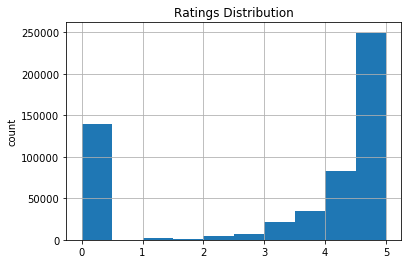

In [78]:
import matplotlib.pyplot as plt
dfTest['avgrating'].hist()
plt.title('Ratings Distribution')
plt.ylabel('count')
# plt.xlabel('ratings') 
plt.show()

In [79]:
dfTest['avgrating'].value_counts()

5.0    145834
0.0    139949
4.5    103563
4.0     83458
3.5     34405
3.0     21227
2.5      6561
2.0      4117
1.0      2732
1.5       837
Name: avgrating, dtype: int64

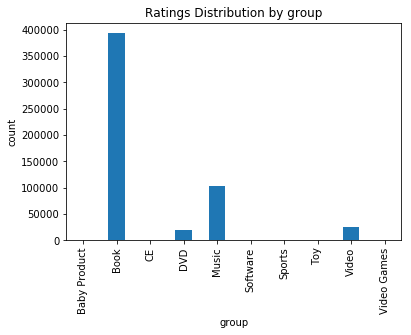

In [83]:
dfTest.groupby(['group'])['Id'].count().plot.bar()
plt.title('Ratings Distribution by group')
plt.ylabel("count")


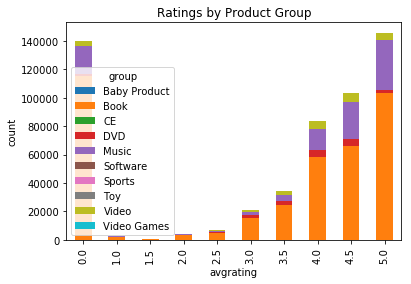

In [84]:
dfTest.groupby(['avgrating','group'])['avgrating'].count().unstack().plot.bar(stacked=True)
plt.title('Ratings by Product Group')
plt.ylabel('count')

In [86]:
# dfTest.groupby(['categories'])['Id'].count().plot.bar()
# plt.title('Ratings Distribution by categories')
# plt.ylabel("count")

dfTest['categories'].value_counts()

2      96585
3      95636
4      82447
1      54645
5      52002
6      39143
7      23130
0      22903
8      18997
9      11006
10      8517
11      5463
12      4408
13      3140
14      3114
15      2857
16      2445
17      2055
18      1808
19      1647
21      1524
20      1350
22      1239
23      1073
24       834
25       764
26       671
27       560
28       448
29       383
       ...  
50         4
63         4
68         3
75         3
66         3
77         3
61         3
59         3
82         2
72         2
87         2
88         2
101        2
64         2
79         2
89         1
90         1
95         1
81         1
97         1
67         1
80         1
76         1
74         1
73         1
71         1
70         1
69         1
58         1
116        1
Name: categories, dtype: int64

Product thinking
Now, put on your 'product thinking' hat:

* Is it a good idea to show users the categorization hierarchy for items?

 **Some hierarchies may be useful as it gives more liberty to the users to navigate the site with more freedom and flexibility, 
 yet too many hierarchies can be too overwhelming and can cause unnecessary overloading. Hence , I dont think exposing too many 
 hierarchies would be helpful.
 

* Is it a good idea to show users similar/co-purchased items? 

 **Yes. It's very very likely that similar items catch users interest since these items are frequently bought by others along  
 with the primary item. That can persuade consumer's buying behaviour even if the user is not looking for those additional items 
 at that time, if the suggestions pop up, its probable that the user could tag them along with the primary product.


* Is it a good idea to show users reviews and ratings for items?

  **Yes, It is a good idea to show users reviews and ratings for the items of interest. Reviews are the unbiased opinion of the  
  products by other consumers. For a new consumer, it serves as a source to check the credibility and authenticity of the 
  product, its quality, it's price worthiness etc before making a purchasing decision. At the sametime, it also serves as a 
  source of feedback for the manufacturer of the products to evaluate the product's presence and performance in the market. It 
  also fosters a healthy competition between rival manufacturers. More popular products sell more! And above all it provides a 
  well formed community for users that builds trust among users and with the site itself.
  

* For each of the above, why? How will you establish the same?
 
 **We could employ clustering analysis for category analysis based on vectors of co-purchased features to determine how many   
 groups of products exist. From these groups of products we could compute cluster statistics and create product categories based  
 on those statistics.
